# Exploration of Video Game Dataset

This notebook explores various aspects of game popularity and player reception using visualizations.  

I focus on average user ratings as our main measure of how much games are *loved*, and break down patterns across time, genre, platform, maturity, and engagement metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("..")
import plots as p

games = pd.read_csv("..\data\games_data_cleaned.csv")
games.columns

Index(['id', 'name', 'avg_user_rating', 'user_ratings_count', 'reviews_count',
       'added', 'avg_playtime', 'esrb_rating', 'release_year', 'release_month',
       'release_quarter', 'critic_rating', 'rating_gap', 'genre_count',
       'is_action', 'is_adventure', 'is_arcade', 'is_board_games', 'is_card',
       'is_casual', 'is_educational', 'is_family', 'is_fighting', 'is_indie',
       'is_massively_multiplayer', 'is_platformer', 'is_puzzle', 'is_rpg',
       'is_racing', 'is_shooter', 'is_simulation', 'is_sports', 'is_strategy',
       'platform_type', 'platform_count', 'store_count'],
      dtype='object')

### Descriptive Statistics

In [2]:
games.describe()

,id,avg_user_rating,user_ratings_count,reviews_count,added,avg_playtime,release_year,release_month,release_quarter,critic_rating,...,is_platformer,is_puzzle,is_rpg,is_racing,is_shooter,is_simulation,is_sports,is_strategy,platform_count,store_count
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,3956.000000,...,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,107105.728392,3.262998,183.978454,186.218419,1307.114381,4.146516,2013.837848,6.824058,2.605023,3.734783,...,0.048756,0.072519,0.229623,0.049249,0.099360,0.148732,0.048510,0.201921,3.224575,2.503940
std,203033.432945,0.730541,411.593953,416.511555,1864.651985,13.717566,6.258022,3.374422,1.117685,0.519407,...,0.215372,0.259361,0.420616,0.216401,0.299163,0.355846,0.214855,0.401458,2.053297,1.589213
min,2.000000,1.170000,10.000000,10.000000,192.000000,0.000000,1979.000000,1.000000,1.000000,1.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,10354.250000,2.780000,24.000000,24.000000,360.000000,1.000000,2011.250000,4.000000,2.000000,3.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,18751.000000,3.360000,54.000000,55.000000,650.000000,3.000000,2015.000000,7.000000,3.000000,3.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,51330.500000,3.830000,146.000000,148.000000,1365.750000,4.000000,2018.000000,10.000000,4.000000,4.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000
max,993875.000000,4.820000,7160.000000,7275.000000,22138.000000,900.000000,2024.000000,12.000000,4.000000,4.950000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,9.000000


#### Distribution of Success Metrics

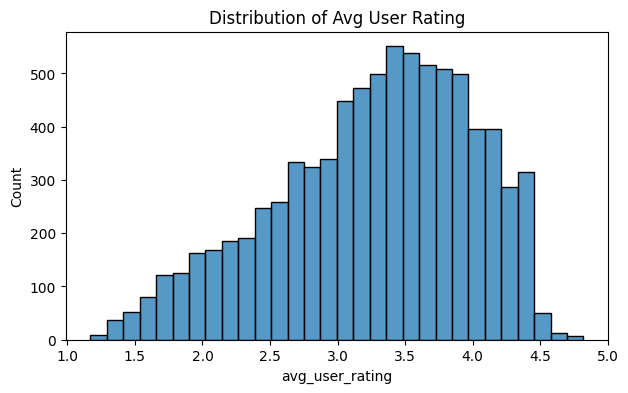

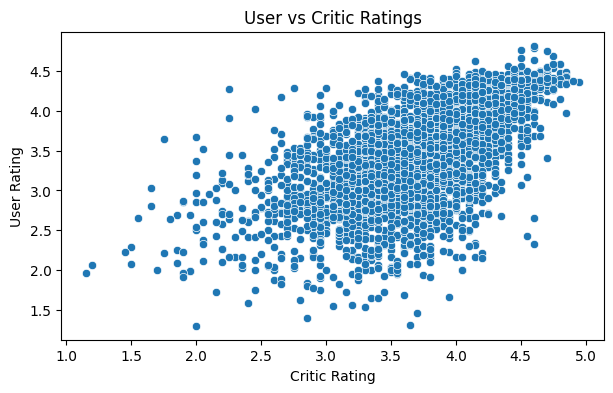

In [3]:
metric= 'avg_user_rating'
p.success_hist(games, metric)
p.rating_scatter(games,'critic_rating','avg_user_rating')

#### Correlation Between Numeric Features

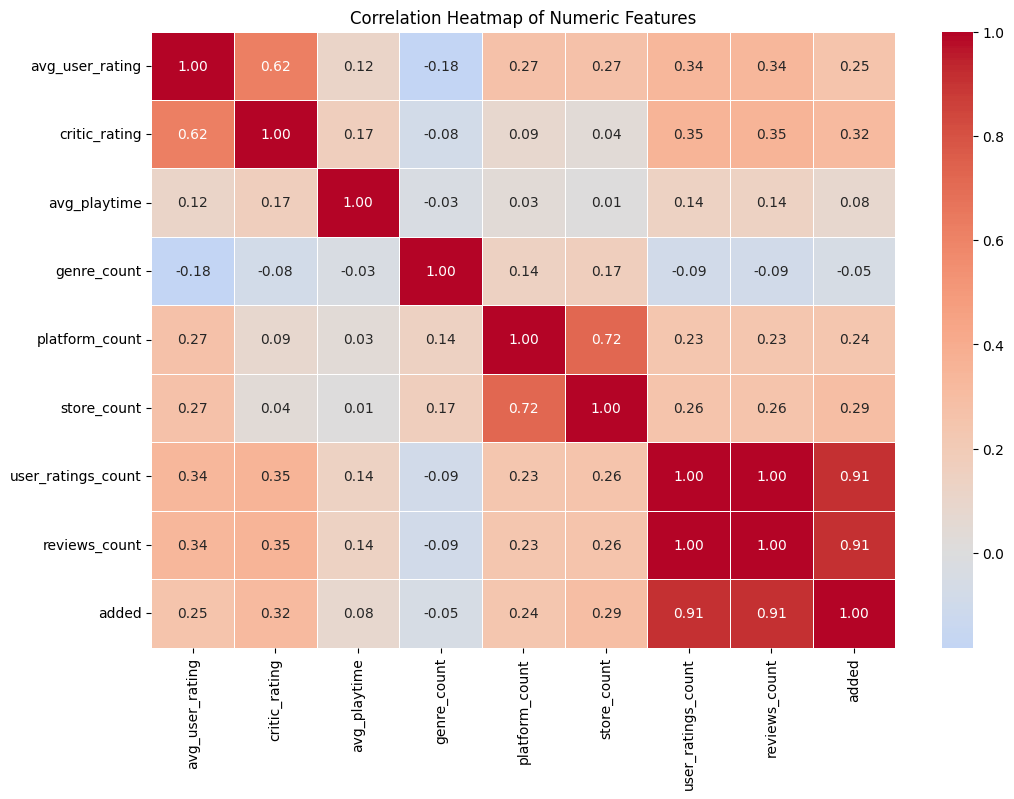

In [4]:
num_cols = [
    'avg_user_rating',
    'critic_rating',                    
    'avg_playtime',
    'genre_count',
    'platform_count',
    'store_count',
    'user_ratings_count',
    'reviews_count',
    'added'                   
]

corr_matrix = games[num_cols].corr()
p.correlation(corr_matrix)

#### Time Based Trends

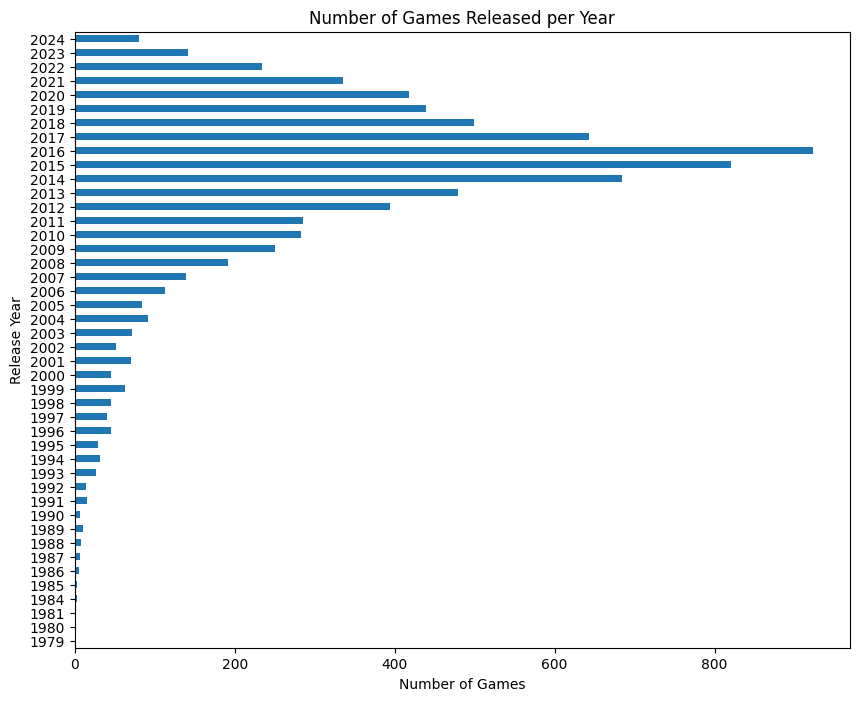

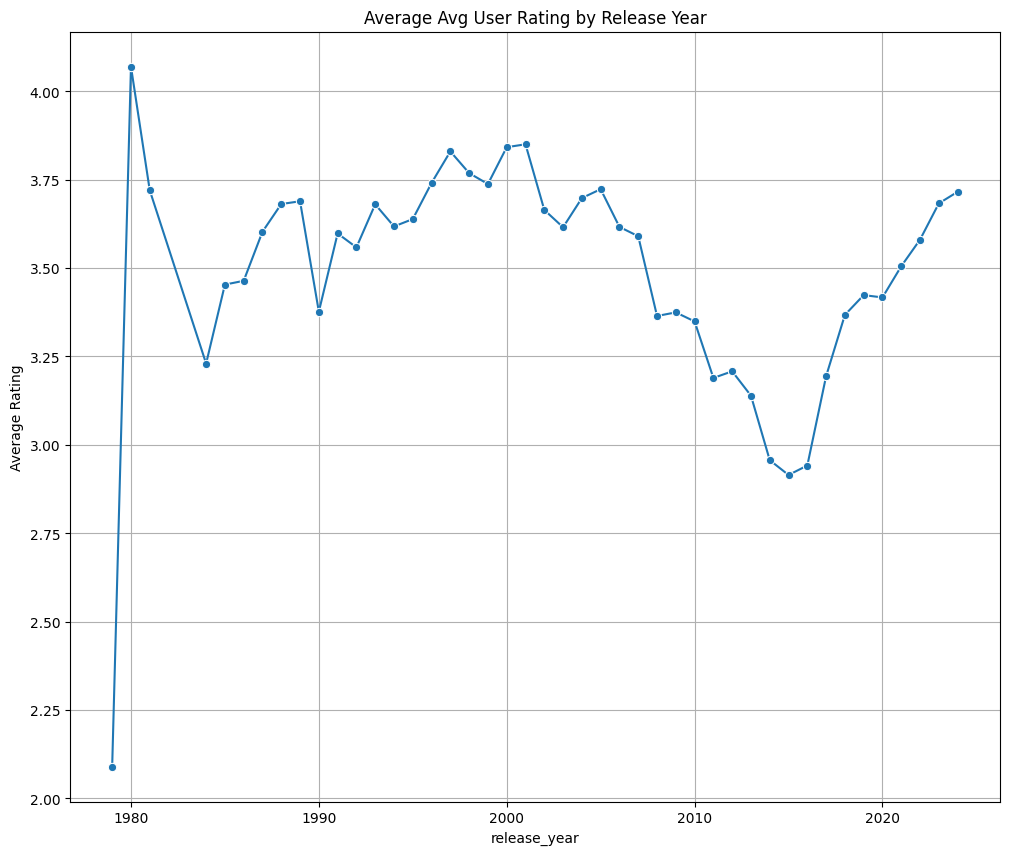

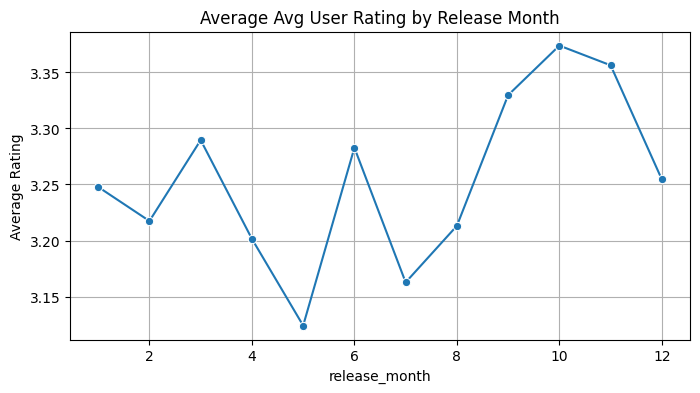

,release_quarter,avg_user_rating
0,1,3.252738
1,2,3.200295
2,3,3.245539
3,4,3.338484


In [5]:
rel_count = games['release_year'].value_counts().sort_index().plot(kind='barh', figsize=(10, 8))
p.rel_time()

yearly_avg = games.groupby(['release_year'])[metric].mean().reset_index()
p.metric_year(yearly_avg, metric)

month_avg =  games.groupby(['release_month'])[metric].mean().reset_index()
p.metric_month(month_avg, metric)

quarter_avg = games.groupby(['release_quarter'])[metric].mean().reset_index()
quarter_avg

#### Genre Analysis

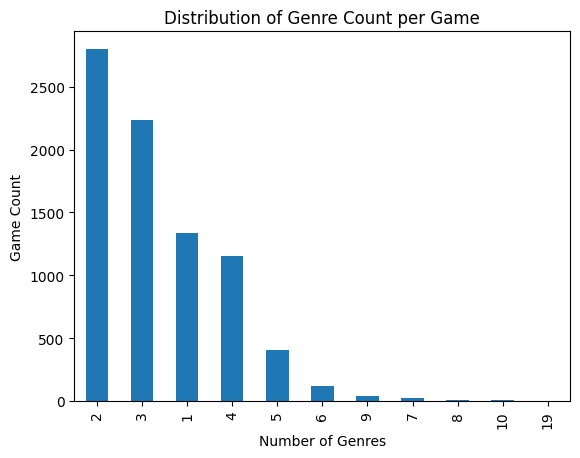

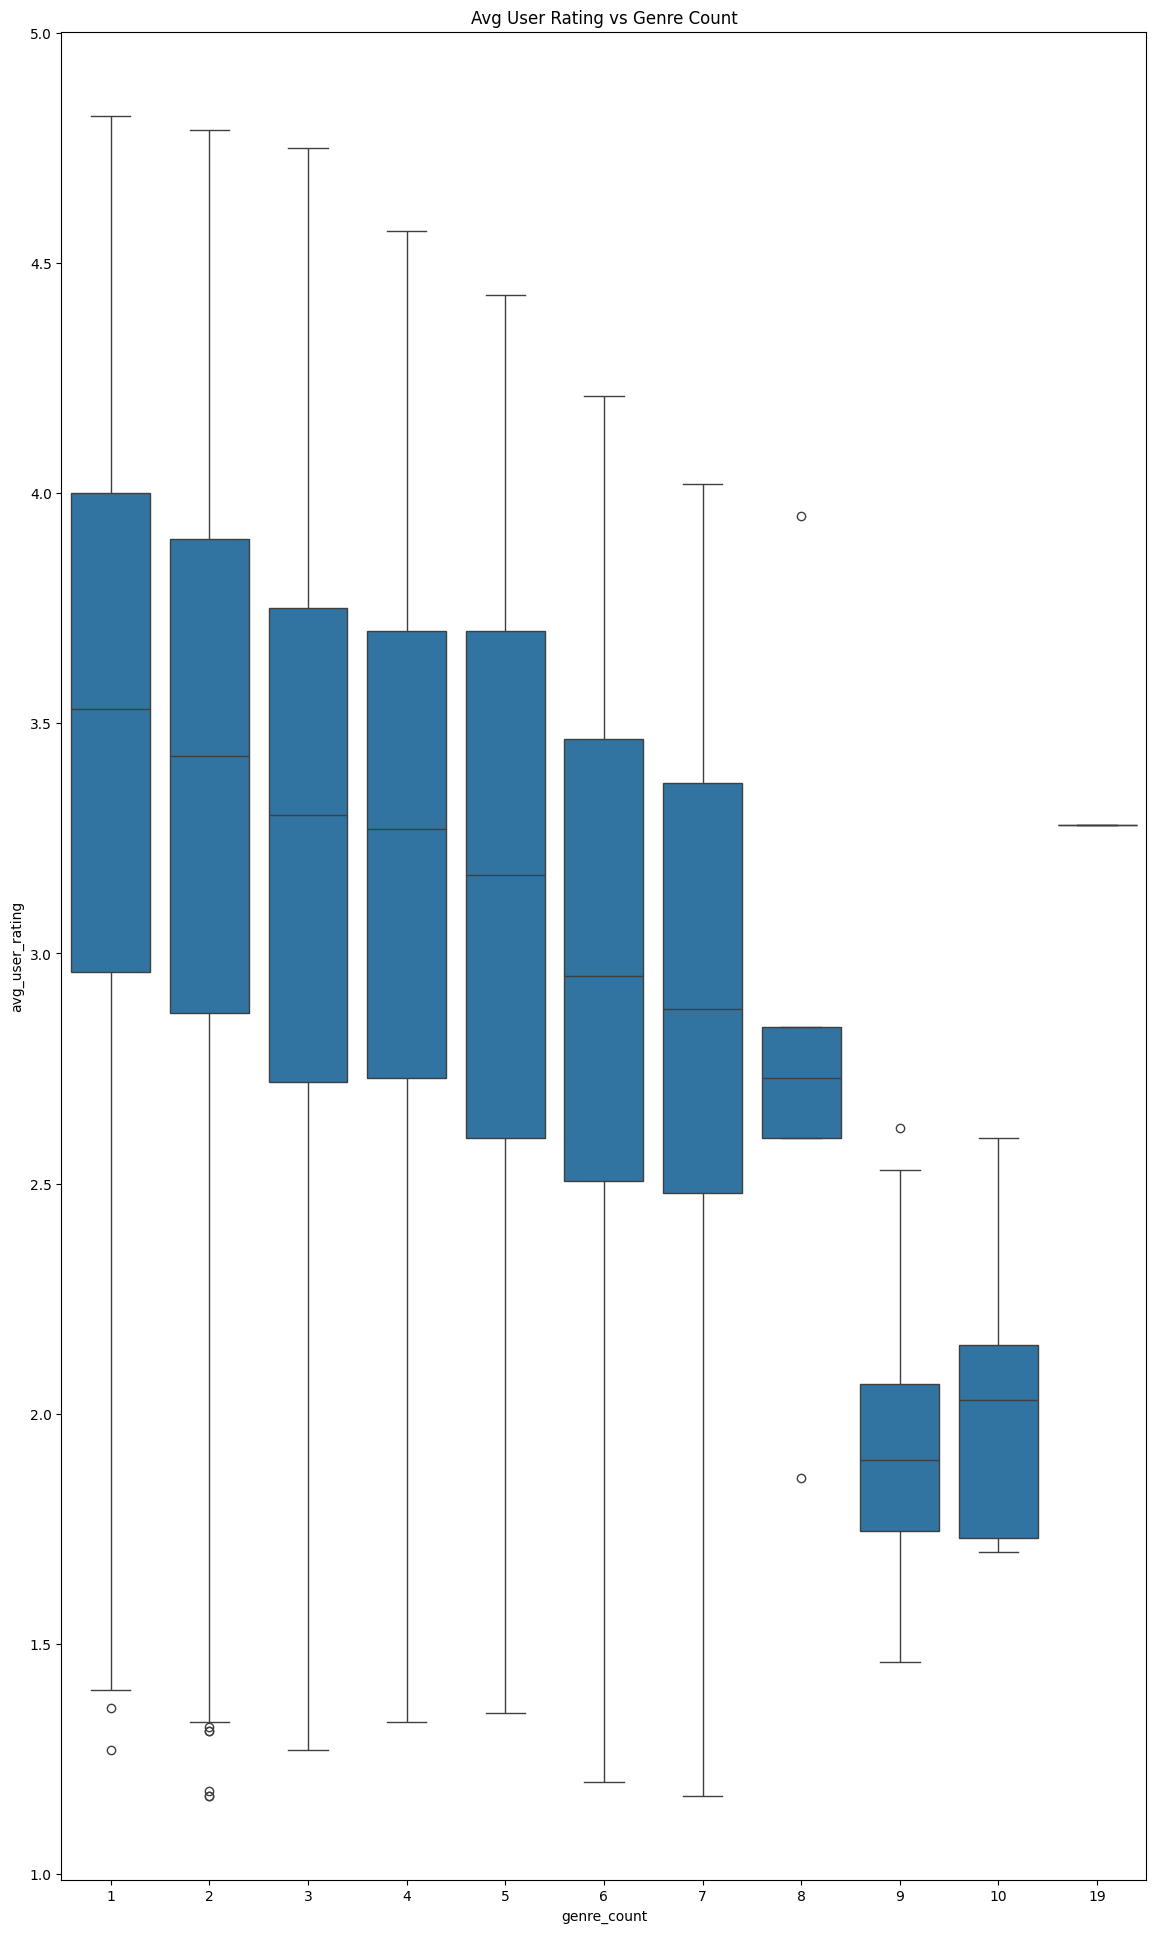

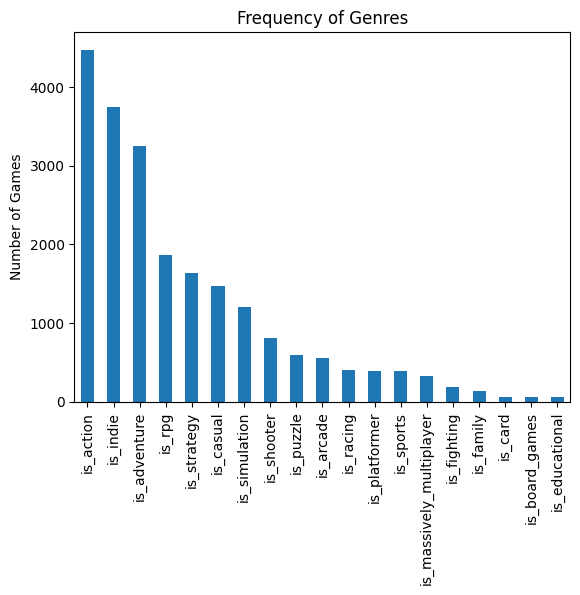

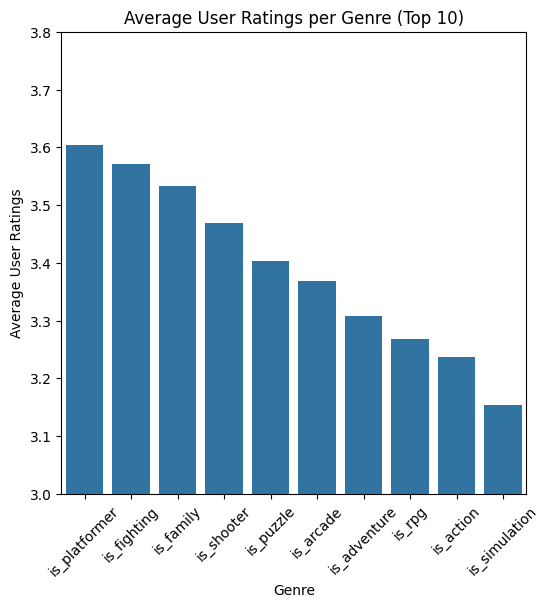

In [6]:
p.count_genre(games)

# Compare average ratings across genre counts
p.compare_genre(games, metric)

# Frequency of each genre
encoded_genres = games.loc[:, 'is_action':'is_strategy']
encoded_genres.sum().sort_values(ascending= False).plot(kind='bar')
plt.title("Frequency of Genres")
plt.ylabel("Number of Games")

# Compare average user ratings across genres
p.avg_ratings_genre(games, encoded_genres, metric)


#### Reach and Distribution 

In [7]:
games['platform_type'].value_counts()

platform_type
multi_platform    3768
pc_only           3690
console_only       594
other               70
Name: count, dtype: int64

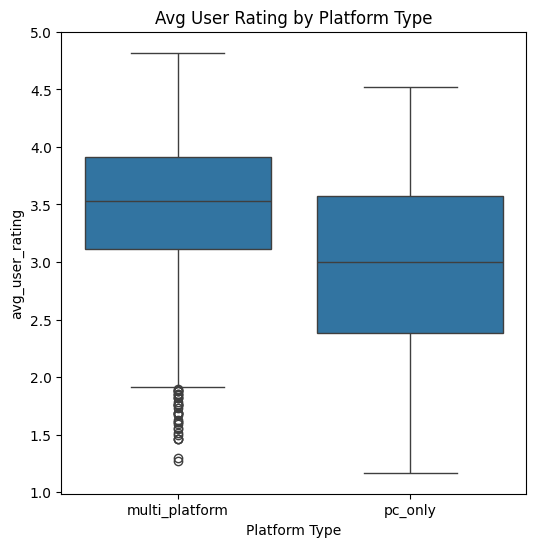

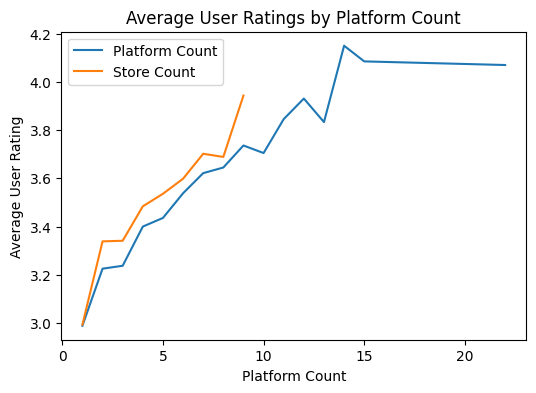

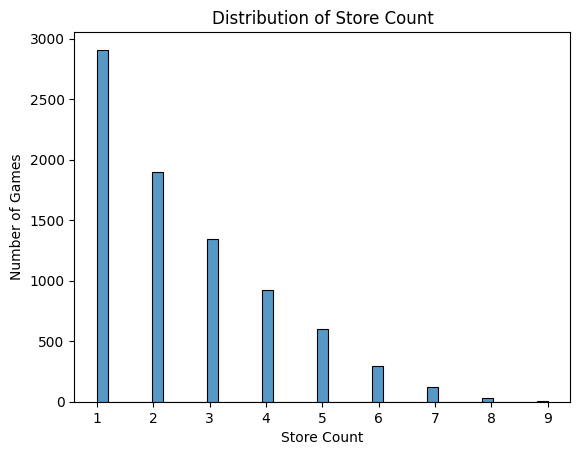

In [8]:
p.compare_platforms(games, metric)
p.compare_platform_store_count(games)

p.store_dist(games['store_count'])


#### Maturity Analysis

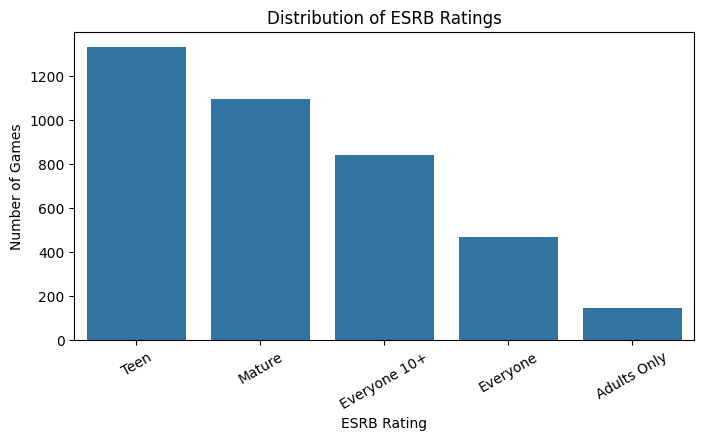

esrb_rating
Teen            1332
Mature          1096
Everyone 10+     843
Everyone         469
Adults Only      144
Name: count, dtype: int64


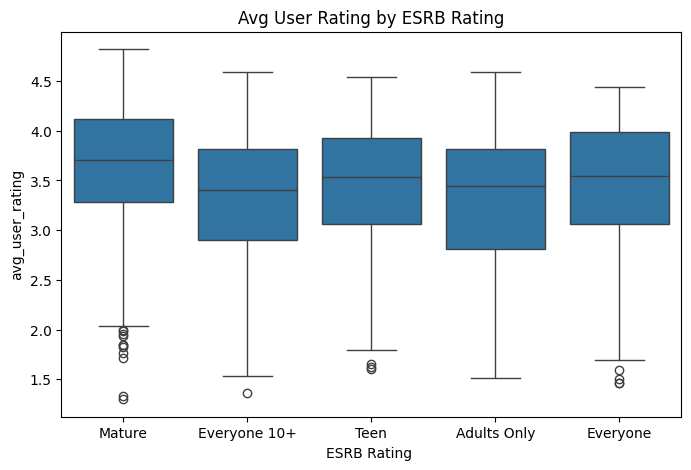

In [9]:
p.mature_count(games)

p.mature_comp(games,metric)

#### Engagement Features

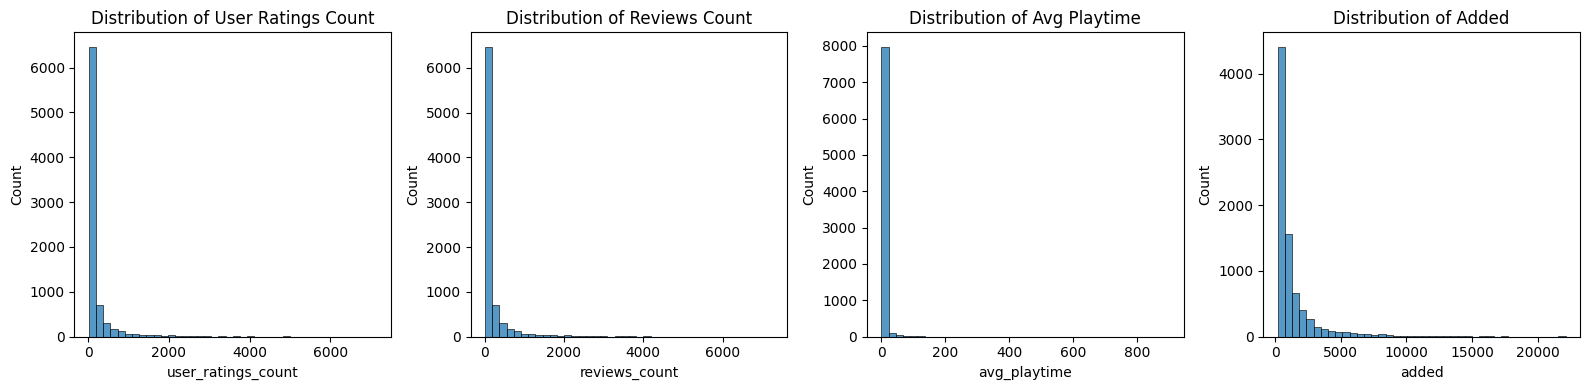

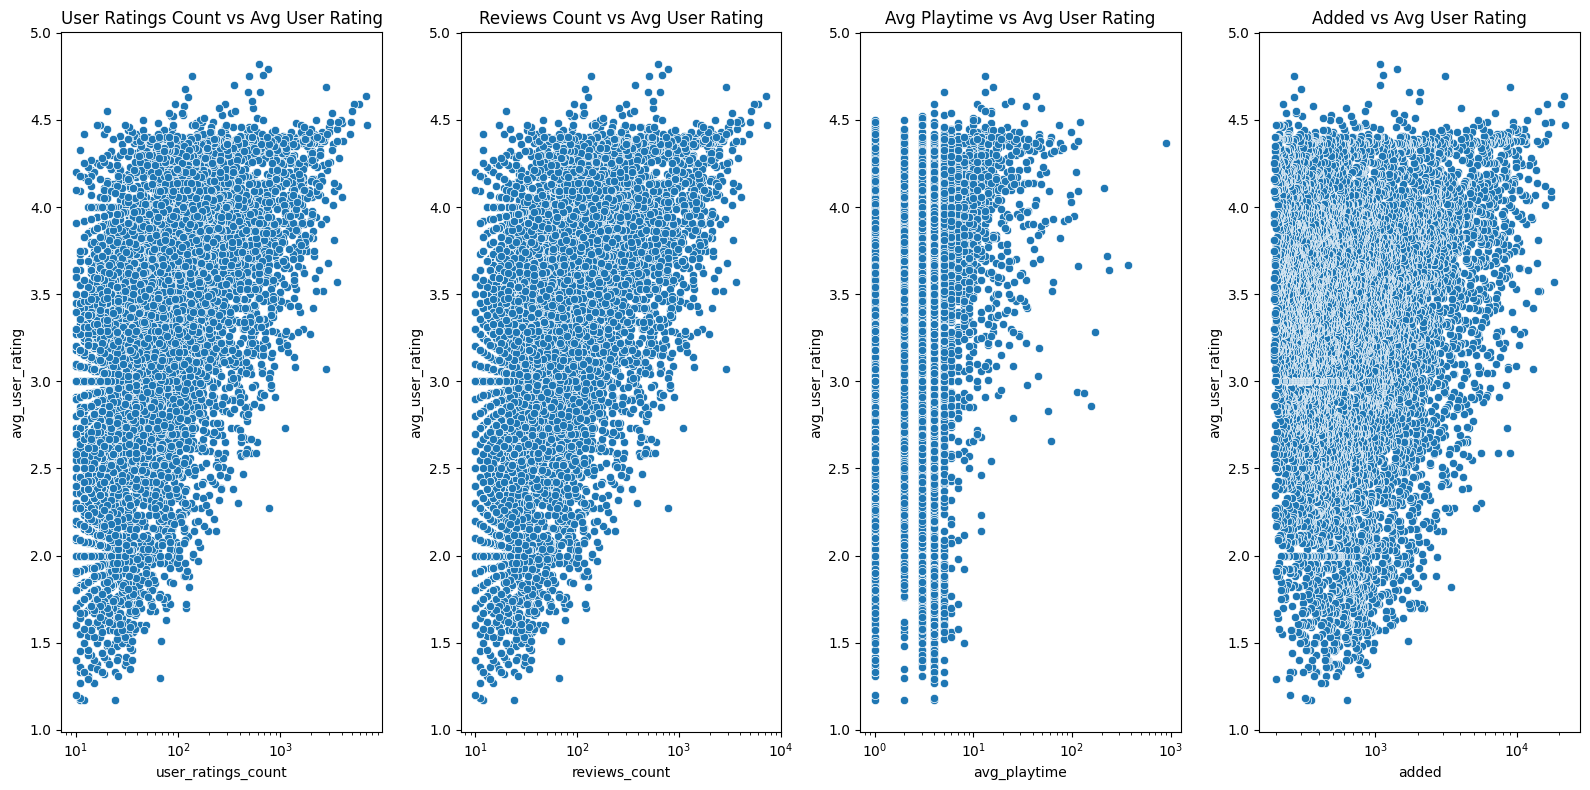

In [10]:
engagement_features = ['user_ratings_count', 'reviews_count', 'avg_playtime', 'added']
p.engage_dist(games, engagement_features)
p.engage_plot(games, engagement_features, metric)

# SUPPLEMENRATY ANALYSIS

### User-Critic Gap Analysis

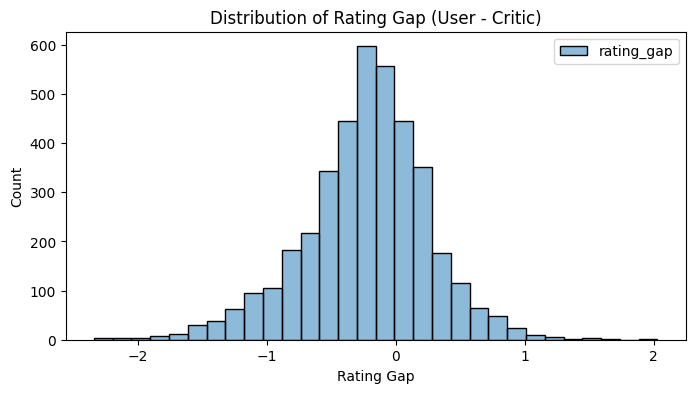

In [11]:
paired = games[['rating_gap']].dropna().copy()
p.gap_distr(paired)

In [12]:
# Fans love, critics don't
games.sort_values('rating_gap', ascending=False)[['name', 'avg_user_rating', 'critic_rating', 'rating_gap']].head(10)

,name,avg_user_rating,critic_rating,rating_gap
4324,Earthworm Jim 2,4.28,2.25,2.03
5221,Konung 2,3.65,1.75,1.90
5089,The Chaos Engine,3.67,2.00,1.67
3811,Hard Truck: Apocalypse,3.91,2.25,1.66
3623,Sonic Adventure,4.02,2.45,1.57
6399,Mega Man X (1993),4.29,2.75,1.54
6730,Blade Runner,4.18,2.65,1.53
7580,Brigade E5: New Jagged Union,3.52,2.05,1.47
4947,X Rebirth,3.03,1.65,1.38
7001,Altered Beast (1988),3.37,2.00,1.37


In [13]:
# Critics love, fans don't
games.sort_values('rating_gap')[['name', 'avg_user_rating', 'critic_rating', 'rating_gap']].head(10)

,name,avg_user_rating,critic_rating,rating_gap
5976,Guncraft,1.31,3.65,-2.34
2099,Weird Worlds: Return to Infinite Space,1.66,3.95,-2.29
5955,Out of the Park Baseball 17,2.33,4.60,-2.27
4793,Uurnog Uurnlimited,1.46,3.70,-2.24
1967,Tumblestone,2.43,4.55,-2.12
3914,Ultimate General: Gettysburg,2.15,4.20,-2.05
4533,Dangerous High School Girls in Trouble!,2.00,4.05,-2.05
1732,Waveform,2.00,4.05,-2.05
1474,"Time Gentlemen, Please! and Ben There, Dan Tha...",2.21,4.20,-1.99
1077,RACE 07,2.16,4.15,-1.99


### Platform Type Over Time

Do user preferences for PC vs Console games shift over time?

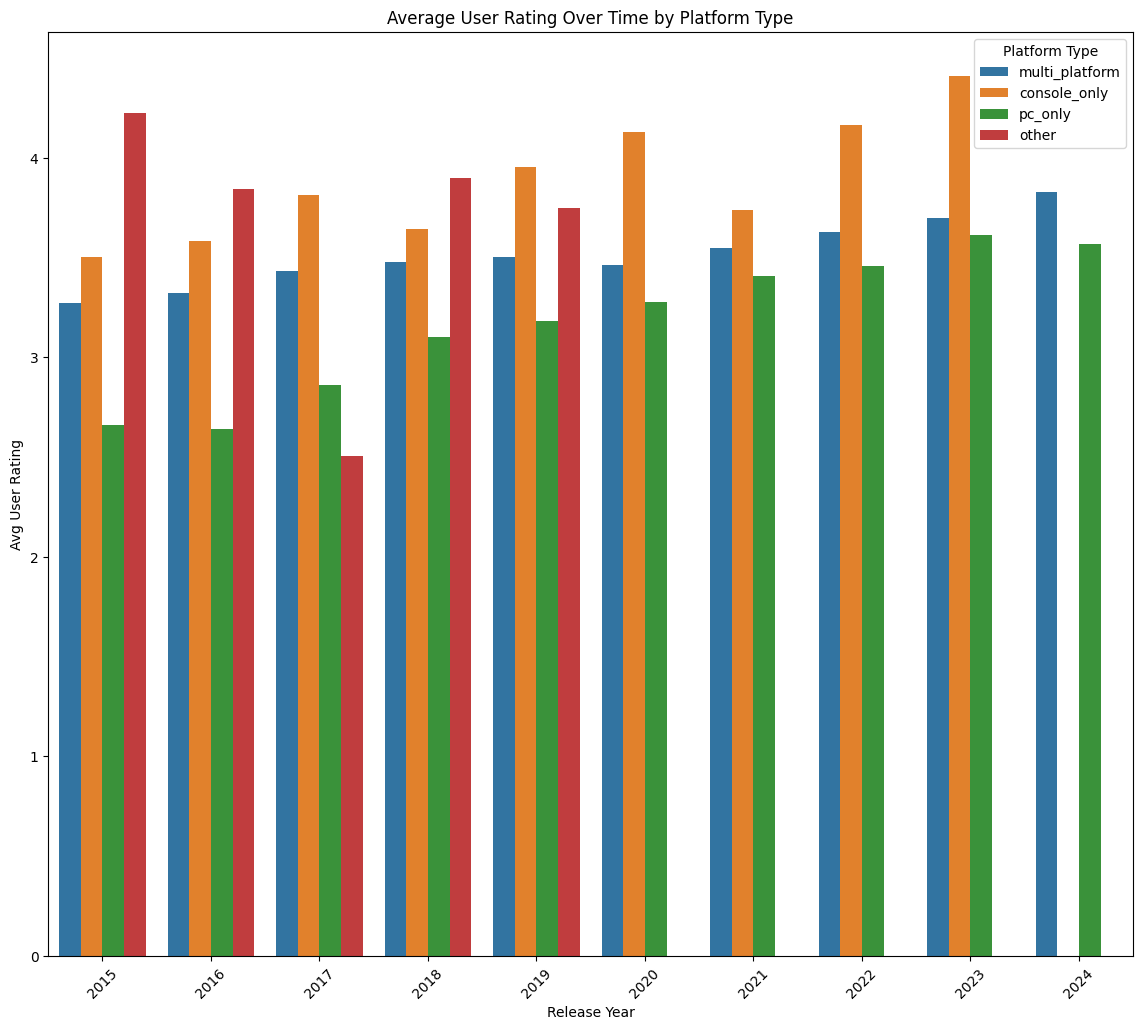

In [14]:
p.platform_year(games[games['release_year'].between(2015,2024)])